In [7]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

In [8]:
#viewing dataset
player_stats<-read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
player_stats


Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [9]:
#---TIDYING DATA---

colnames(player_stats) <- make.names(colnames(player_stats)) #Removing spaces from column names

#Removing useless characters in different cells
player_stats$Prize.Money<-gsub("\\$","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub("US","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub("\\$ ","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub(",","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub(" .*","",as.character(player_stats$Prize.Money))
player_stats$Current.Rank<-gsub("\\(","",as.character(player_stats$Current.Rank))
player_stats$Current.Rank<-gsub("\\)","",as.character(player_stats$Current.Rank))
player_stats$Current.Elo.Rank<-gsub("\\)","",as.character(player_stats$Current.Elo.Rank))
player_stats$Current.Elo.Rank<-gsub("\\(","",as.character(player_stats$Current.Elo.Rank))
player_stats$Height<-gsub("cm","",as.character(player_stats$Height))

#Separating cells with more than one value in them
player_stats_tidy <- player_stats%>%
    separate(col = Age, into = c("Age", "DOB"),sep = " ") %>%
    separate(col = Best.Rank, into = c("Best.Rank", "Best.Rank.Date"), sep = " ") %>%
    separate(col = Best.Elo.Rank, into = c("Best.Elo.Rank", "Best.Elo.Rank.Date"), sep = " ") %>%
    separate(col = Peak.Elo.Rating, into = c("Peak.Elo.Rating", "Peak.Elo.Rating.Date"), sep = " ") %>%
    separate(col = Current.Elo.Rank,into = c("Current.Elo.Rank", "Current.Elo.Rating"), sep = " ") %>%
    separate(col = Current.Rank,into = c("Current.Rank", "Current.Points"), sep = " ")

#Changing column names into doubles
player_stats_tidy$Prize.Money<-as.numeric(player_stats_tidy$Prize.Money)
player_stats_tidy$Age<-as.numeric(player_stats_tidy$Age)
player_stats_tidy$Height<-as.numeric(player_stats_tidy$Height)
player_stats_tidy$Best.Rank<-as.numeric(player_stats_tidy$Best.Rank)
player_stats_tidy$Best.Elo.Rank<-as.numeric(player_stats_tidy$Best.Elo.Rank)
player_stats_tidy$Peak.Elo.Rating<-as.numeric(player_stats_tidy$Peak.Elo.Rating)
player_stats_tidy$Current.Elo.Rank<-as.numeric(player_stats_tidy$Current.Elo.Rank)
player_stats_tidy$Current.Elo.Rating<-as.numeric(player_stats_tidy$Current.Elo.Rating)
player_stats_tidy$Current.Rank<-as.numeric(player_stats_tidy$Current.Rank)
player_stats_tidy$Current.Points<-as.numeric(player_stats_tidy$Current.Points)
player_stats_tidy$Seasons<-as.numeric(player_stats_tidy$Seasons)
player_stats_tidy <- player_stats_tidy[complete.cases(player_stats_tidy[, "Prize.Money"]),] # Omit NAs in Prize.Money


glimpse(player_stats_tidy)

#---SORTING DATA---

#setting seed. DO NOT REMOVE OR SET SEED ELSEWHERE
set.seed(2022) 

#Removing columnns without numerical values
predictors = c("Age","Height", "Current.Points", "Current.Rank", "Best.Rank", "Current.Elo.Rank", "Current.Elo.Rating", "Best.Elo.Rank", "Peak.Elo.Rating", "Seasons")
player_stats_short<-player_stats_tidy %>%
    select(Prize.Money, all_of(predictors))

#Splitting data into training and testing sets
player_stats_split <- initial_split(player_stats_short, prop = 0.75, strata = Prize.Money)
player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)

#visualizing data
summary_table = player_stats_training %>%
                summary()
summary_table

glimpse(player_stats_training)


Rows: 394
Columns: 44
$ X1                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1…
$ Age                  <dbl> 18, 32, 21, 27, 22, 28, 21, 25, 20, 19, 28, 23, …
$ DOB                  <chr> "(22-12-2001)", "(03-11-1987)", "(29-05-1998)", …
$ Country              <chr> "United Kingdom", "Slovakia", "Korea, Republic o…
$ Plays                <chr> "Left-handed", "Right-handed", "Right-handed", "…
$ Wikipedia            <chr> "Wikipedia", "Wikipedia", "Wikipedia", "Wikipedi…
$ Current.Rank         <dbl> 326, 178, 236, 183, 31, 307, 232, 417, 104, 22, …
$ Current.Points       <dbl> 119, 280, 199, 273, 1398, 131, 205, 81, 534, 170…
$ Best.Rank            <dbl> 316, 44, 130, 17, 31, 213, 229, 253, 104, 17, 14…
$ Best.Rank.Date       <chr> "(14-10-2019)", "(14-01-2013)", "(10-04-2017)", …
$ Name                 <chr> "Jack Draper", "Lukas Lacko", "Duck Hee Lee", "B…
$ Backhand             <chr> "Two-handed", "Two-handed", "Two-handed", "Two-h…
$ Prize.Money          <dbl> 5

  Prize.Money            Age            Height    Current.Points  
 Min.   :     145   Min.   :17.00   Min.   :163   Min.   :  58.0  
 1st Qu.:  118195   1st Qu.:23.00   1st Qu.:180   1st Qu.: 116.0  
 Median :  445928   Median :26.00   Median :185   Median : 207.0  
 Mean   : 1870828   Mean   :26.16   Mean   :185   Mean   : 426.2  
 3rd Qu.: 1828711   3rd Qu.:29.00   3rd Qu.:190   3rd Qu.: 429.0  
 Max.   :25889586   Max.   :38.00   Max.   :198   Max.   :5890.0  
                                    NA's   :223   NA's   :1       
  Current.Rank     Best.Rank     Current.Elo.Rank Current.Elo.Rating
 Min.   :  5.0   Min.   :  3.0   Min.   :  4.0    Min.   :1554      
 1st Qu.:126.0   1st Qu.: 47.5   1st Qu.: 57.0    1st Qu.:1763      
 Median :229.0   Median :135.0   Median :104.5    Median :1822      
 Mean   :234.3   Mean   :152.0   Mean   :101.1    Mean   :1841      
 3rd Qu.:337.0   3rd Qu.:218.5   3rd Qu.:144.8    3rd Qu.:1914      
 Max.   :499.0   Max.   :488.0   Max.   :191.0    

Rows: 298
Columns: 11
$ Prize.Money        <dbl> 3261567, 6091971, 1517157, 278709, 59123, 74927, 1…
$ Age                <dbl> 32, 27, 22, 28, 21, 20, 19, 28, 23, 28, 31, 22, 20…
$ Height             <dbl> 185, 193, NA, NA, NA, NA, NA, NA, NA, NA, 198, NA,…
$ Current.Points     <dbl> 280, 273, 1398, 131, 205, 534, 1701, 359, 74, 411,…
$ Current.Rank       <dbl> 178, 183, 31, 307, 232, 104, 22, 148, 431, 134, 12…
$ Best.Rank          <dbl> 44, 17, 31, 213, 229, 104, 17, 143, 319, 134, 3, 1…
$ Current.Elo.Rank   <dbl> 144, 100, 33, NA, NA, NA, 51, NA, NA, NA, 4, NA, 6…
$ Current.Elo.Rating <dbl> 1764, 1826, 1983, NA, NA, NA, 1926, NA, NA, NA, 22…
$ Best.Elo.Rank      <dbl> 60, 21, 33, NA, NA, NA, 30, 149, NA, NA, 3, NA, 60…
$ Peak.Elo.Rating    <dbl> 1886, 2037, 1983, NA, NA, NA, 1992, 1744, NA, NA, …
$ Seasons            <dbl> 14, 11, 5, 1, 1, 3, 3, 8, NA, 5, 14, 2, 3, 6, 14, …


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 223 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 180 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 180 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 138 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 138 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, metho

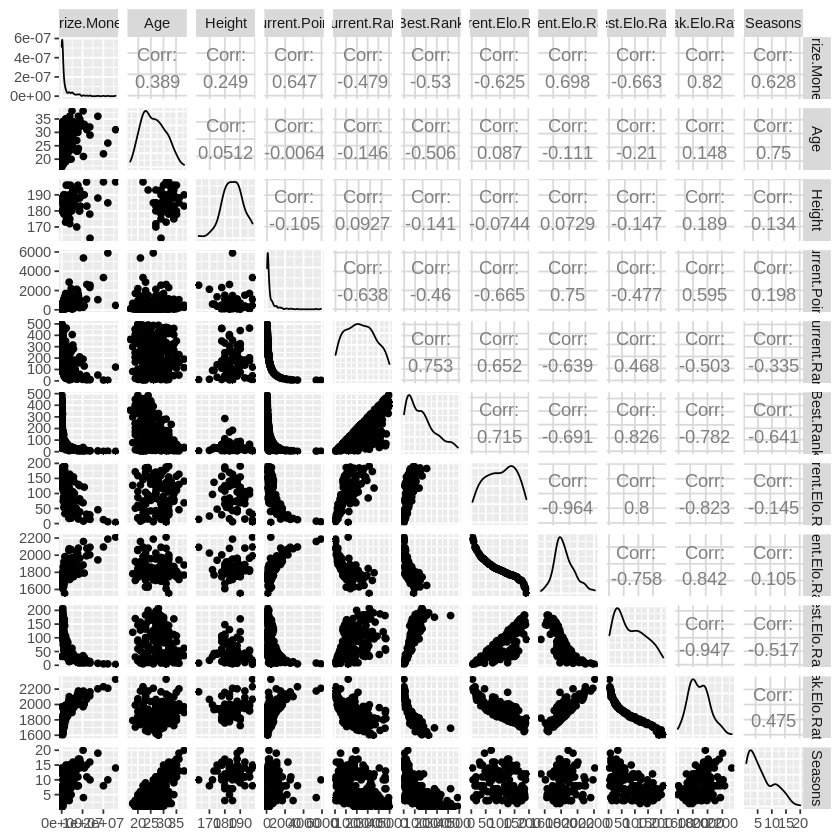

In [10]:

#ggpairs plot to determine which data is useful
ggpair_plot<-player_stats_training%>%
    ggpairs()

ggpair_plot

# REMOVE # for bigger plots

# Best_Rank_plot<-player_stats_training%>%
#     ggplot(aes(x=Best.Rank, y=Prize.Money))+
#     geom_point() +
#     labs(x="Best Rank", y ="Prize Money", title = "Prize Money vs Best Rank")+
#     theme(text = element_text(size = 20))
# Current_Points_plot<-player_stats_training%>%
#     ggplot(aes(x=Current.Points, y=Prize.Money))+
#     geom_point() +
#     labs(x="Current Points", y ="Prize Money", title = "Prize Money vs Current Points")+
#     theme(text = element_text(size = 20))
# Current_Rank_plot<-player_stats_training%>%
#     ggplot(aes(x=Current.Rank, y=Prize.Money))+
#     geom_point() +
#     labs(x="Current Rank", y ="Prize Money", title = "Prize Money vs Current Rank")+
#     theme(text = element_text(size = 20))
# Current_Elo_Rank_plot<-player_stats_training%>%
#     ggplot(aes(x=Current.Elo.Rank, y=Prize.Money))+
#     geom_point() +
#     labs(x="Current Elo Rank", y ="Prize Money", title = "Prize Money vs Current Elo Rank")+
#     theme(text = element_text(size = 20))
# Current_Elo_Rating_plot<-player_stats_training%>%
#     ggplot(aes(x=Current.Elo.Rating, y=Prize.Money))+
#     geom_point() +
#     labs(x="Current Elo Rating", y ="Prize Money", title = "Prize Money vs Current Elo Rating")+
#     theme(text = element_text(size = 20))
# Best_Elo_Rank_plot<-player_stats_training%>%
#     ggplot(aes(x=Best.Elo.Rank, y=Prize.Money))+
#     geom_point() +
#     labs(x="Best Elo Rank", y ="Prize Money", title = "Prize Money vs Best Elo Rank")+
#     theme(text = element_text(size = 20))
# Peak_Elo_Rating_plot<-player_stats_training%>%
#     ggplot(aes(x=Peak.Elo.Rating, y=Prize.Money))+
#     geom_point() +
#     labs(x="Peak Elo Rating", y ="Prize Money", title = "Prize Money vs Peak Elo Rating")+
#     theme(text = element_text(size = 20))
# Seasons_plot<-player_stats_training%>%
#     ggplot(aes(x=Seasons, y=Prize.Money))+
#     geom_point() +
#     labs(x="Seasons", y ="Prize Money", title = "Prize Money vs Seasons")+
#     theme(text = element_text(size = 20))
# Best_Rank_plot
# Current_Points_plot
# Current_Rank_plot
# Current_Elo_Rank_plot
# Current_Elo_Rating_plot
# Best_Elo_Rank_plot
# Peak_Elo_Rating_plot
# Seasons_plot

The following factors have a high correlation (|correlation|>0.9):  
Current Elo Rank & Current Elo Rating  
Best Elo Rank & Peak Elo Rating  
This makes sense since they mean the same thing. Rating will be kept over Rank since it gives more information.  

Rows: 298
Columns: 6
$ Prize.Money     <dbl> 3261567, 6091971, 1517157, 278709, 59123, 74927, 1893…
$ Age             <dbl> 32, 27, 22, 28, 21, 20, 19, 28, 23, 28, 31, 22, 20, 2…
$ Height          <dbl> 185, 193, NA, NA, NA, NA, NA, NA, NA, NA, 198, NA, NA…
$ Current.Points  <dbl> 280, 273, 1398, 131, 205, 534, 1701, 359, 74, 411, 46…
$ Peak.Elo.Rating <dbl> 1886, 2037, 1983, NA, NA, NA, 1992, 1744, NA, NA, 232…
$ Seasons         <dbl> 14, 11, 5, 1, 1, 3, 3, 8, NA, 5, 14, 2, 3, 6, 14, 15,…


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 223 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 138 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 38 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 223 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 138 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method

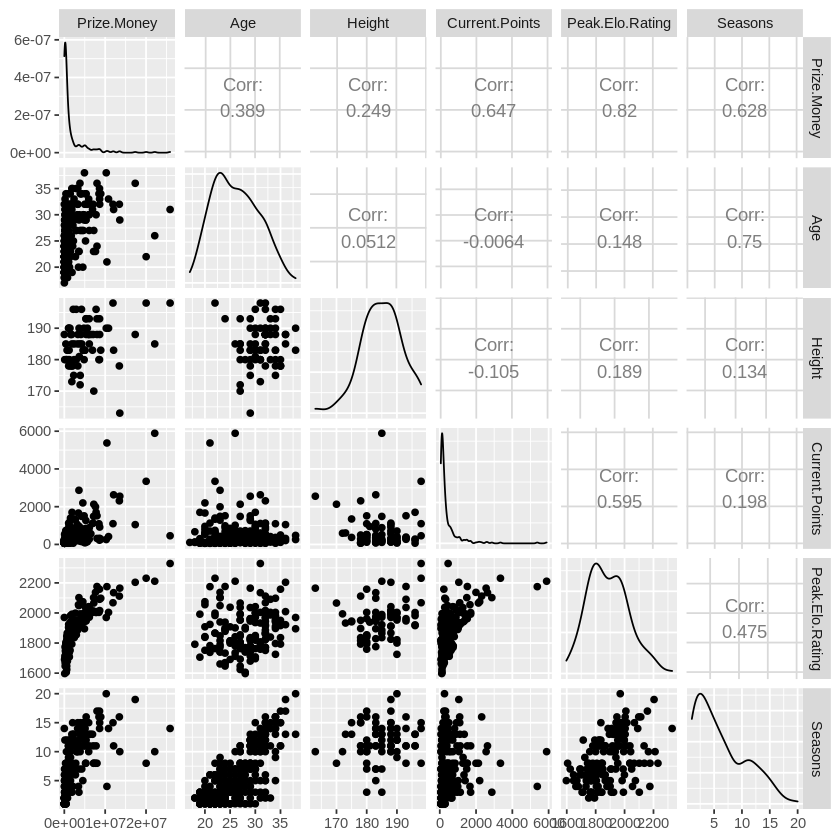

In [11]:
#shortening training set to relevant variables
player_training_short<- player_stats_training%>%
    select(-Current.Elo.Rank, -Best.Elo.Rank, -Current.Elo.Rating, -Best.Rank, -Current.Rank, -Height)

#Visualizing data
glimpse(player_training_short)

ggpair_plot_2<-player_training_short%>%
    ggpairs()

ggpair_plot_2

In [18]:
set.seed(1234) 

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 

player_recipe <- recipe(Prize.Money ~ ., data = player_training_short) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())

player_vfold = vfold_cv(player_training_short, v = 5, strata = Prize.Money)

player_vfold
player_workflow = workflow() %>%
       add_recipe(player_recipe) %>%
        add_model(player_spec)

gridvals = tibble(neighbors = seq(1, 50))

player_results = player_workflow %>%
                    tune_grid(resamples = player_vfold, grid = gridvals) %>%
                    collect_metrics() 
player_results

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,5.240356e+06,5,4.138554e+05,Model01
1,rsq,standard,5.670233e-02,5,2.273693e-02,Model01
2,rmse,standard,3.887652e+06,5,2.219912e+05,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,2.090911e-01,5,5.501956e-02,Model49
50,rmse,standard,3.108386e+06,5,3.273929e+05,Model50
50,rsq,standard,2.062195e-01,5,5.322204e-02,Model50
